<div class="alert alert-block alert-info">
<b>An example of Persistent Homology with Spheres</b>
</div>

In [ ]:
using Eirene
using DelimitedFiles
using PlotlyJS

Here we load our data, which is crucial given we will be working in 3D Spherical Coordinates.
So the X,Y and Z axis will be plotted but individually axis must be in their own row vectors.
For example 
1. X row vector -> [0.5, 0.6,..., 0.9]
2. Y row vector -> [0.5, 0.6,..., 0.9]
 and so on.

We will be using Eirene where Eirene computes the Persistent Homology of our data and we can only compute it through three types of inputs which are 
1. Distance Matrices
2. Point Clouds
3. Complexes

In this notebook, we will only be computing through pointclouds.

In [25]:

file = "sphere_coordinates.csv"
folder = "C:/Users/jevin/Documents/Documents/Education/Self-Learning/Persistant Homology/PHAML/data/"
file_path = folder * file
sphere_pc = readdlm(file_path, ',')

3×144 Matrix{Float64}:
 0.0  0.0  0.0  -0.0  -0.0  -0.0  -0.0  -0.0  …   1.03024e-16   1.22465e-16
 0.0  0.0  0.0   0.0   0.0   0.0  -0.0  -0.0     -6.62094e-17  -2.99952e-32
 1.0  1.0  1.0   1.0   1.0   1.0   1.0   1.0     -1.0          -1.0

Here we compute the persistence homology of our data, Eirene only uses the Vietoris–Rips filtration and we will also see Eirene's internel data structure (Dictionary) that stores all of its  information about the computation. Eirene likes to keep a lot of internal data, and we don’t need it for a high-level persistent homology analysis instead we use a couple of diagrams. But I will still explain what some of the data mean.

- Symmat refers to the symmetry matrix that Eirene uses when computing Persistent Homology
- maxnz  -> The maximum number of non-zero elements in the boundary matrix
- Cyclerep -> The cycle representatives for each homology class. for e.g. which simplices (0K - N-K simplex) form the actual cycles detected in $H_{1}$,$H_{2}$ etc..
- phi/plo -> This is related to the birth and death of simplicial complexes or filtration indices of the simplices.
- grain and the rest -> Various indexing and bookkeeping arrays that Eirene creates to track how simplices (or covers) are formed, how they’re ordered, or how filtration radii are assigned.

In [5]:
PH = eirene(sphere_pc, maxdim=2, model="pc")

Dict{String, Any} with 12 entries:
  "symmat"   => [444 444 … 67 67; 444 444 … 67 67; … ; 67 67 … 444 409; 67 67 ……
  "maxnz"    => [0, 2801, 123177, 3343438, 0]
  "firstv"   => [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  136, 137, 138, 139, 140, 14…
  "cyclerep" => [Vector{Int64}[], [[144, 139], [144, 142], [144, 138], [3, 9], …
  "phi"      => [Int64[], [9994, 10003, 9987, 287, 832, 831, 10000, 9997, 9973,…
  "plo"      => [Int64[], [139, 142, 138, 9, 12, 11, 141, 140, 136, 10  …  143,…
  "ocg2rad"  => [1.98006, 1.97964, 1.97652, 1.97126, 1.97126, 1.96567, 1.96553,…
  "farfaces" => [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  135, 136, 137, 138, 139, 14…
  "nvl2ovl"  => [25, 36, 13, 24, 109, 120, 132, 121, 14, 23  …  68, 54, 80, 55,…
  "input"    => Dict{String, Any}("genera"=>[0.0 0.0 … 1.03024e-16 1.22465e-16;…
  "tid"      => [Int64[], [139, 142, 138, 9, 12, 11, 141, 140, 136, 10  …  135,…
  "grain"    => [[444, 444, 444, 444, 444, 444, 444, 444, 444, 444  …  444, 444…

The barcode below shows the persistence intervals for homological features
for example <br>
- $H_{1}$ on the left represents the connected component in the filtration process. Each bar (components) start at 0 and end at time t which connotes the notion of birth and death of each connected component.
<br> 
- $H_{2}$ on the right is one dimension higher and includes 2K-Simples (Cycles).


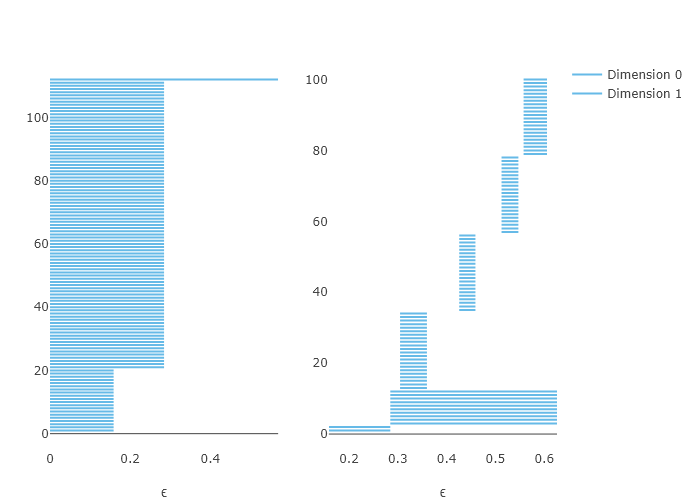

In [116]:
p1 = plotbarcode_pjs(PH,dim=0)
p2 = plotbarcode_pjs(PH,dim=1)
p = [p1  p2]
p


In [123]:
b = barcode(PH, dim=1)


100×2 Matrix{Float64}:
 0.304632  0.359685
 0.304632  0.359685
 0.425839  0.459062
 0.425839  0.459062
 0.425839  0.459062
 0.425839  0.459062
 0.512546  0.547061
 0.512546  0.547061
 0.304632  0.359685
 0.304632  0.359685
 0.304632  0.359685
 0.304632  0.359685
 0.304632  0.359685
 ⋮         
 0.158746  0.28463
 0.158746  0.28463
 0.28463   0.62616
 0.28463   0.62616
 0.28463   0.62616
 0.28463   0.62616
 0.28463   0.62616
 0.28463   0.62616
 0.28463   0.62616
 0.28463   0.62616
 0.28463   0.62616
 0.28463   0.62616

Underneath we can see that there is only one class (Most persistent feature) from our data for $H_{2}$ and we can expect to see only one class in the persistent diagram as well

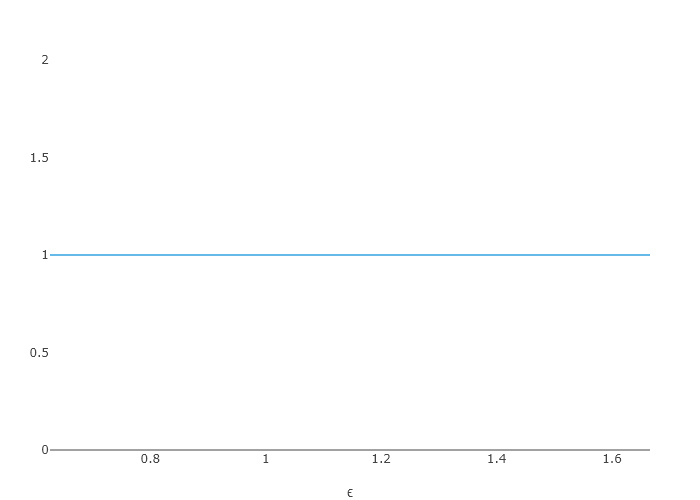

In [87]:
plotbarcode_pjs(PH,dim=2)

Overall Persistent diagram from $H_{0}$ to $H_{2}$

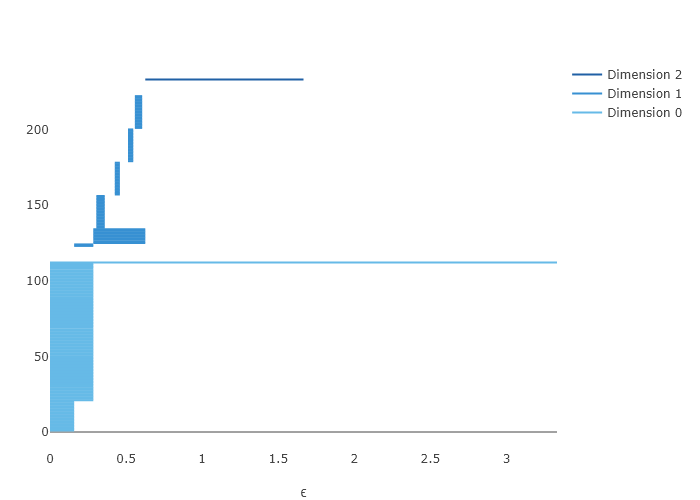

In [88]:
plotbarcode_pjs(PH,dim=0:2)

Here we can see a couple of most persistent features, We don't see all of it but only the most persistent ones and we can see that although the $100^{th}$ class is the last one, however the last most persistent one is the $98^{th}$ class.

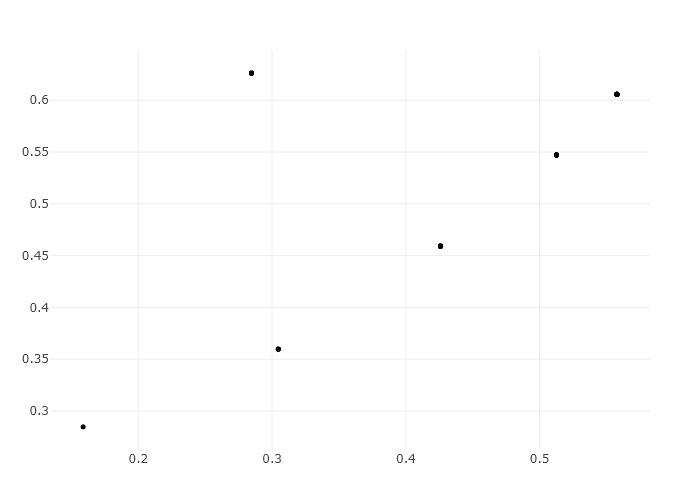

In [70]:
plotpersistencediagram_pjs(PH,dim=1)

Only one most persistent feature in $H_{2}$.

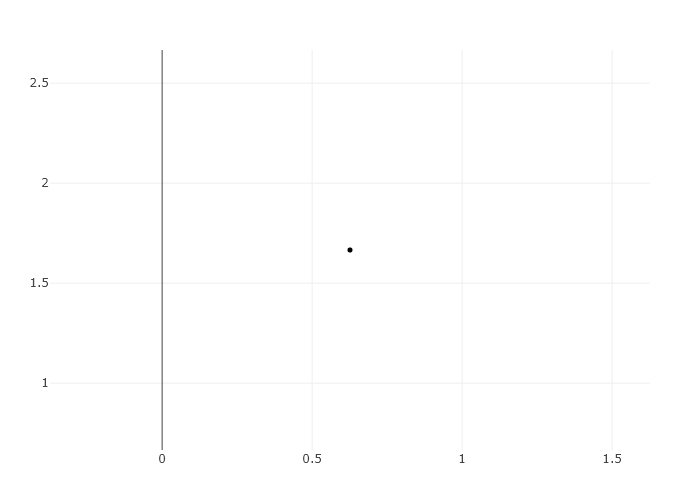

In [112]:
plotpersistencediagram_pjs(PH,dim=2)

Now we plot in $H_{1}$
<br>
We can see that the $1^{st}$ class has the simplest cycle but as the filtration process keeps iterating over it may/may not be the most persistent feature, in this case it's not. the $98^{st}$ class is the most persistent feature, it's basically the last one to die.

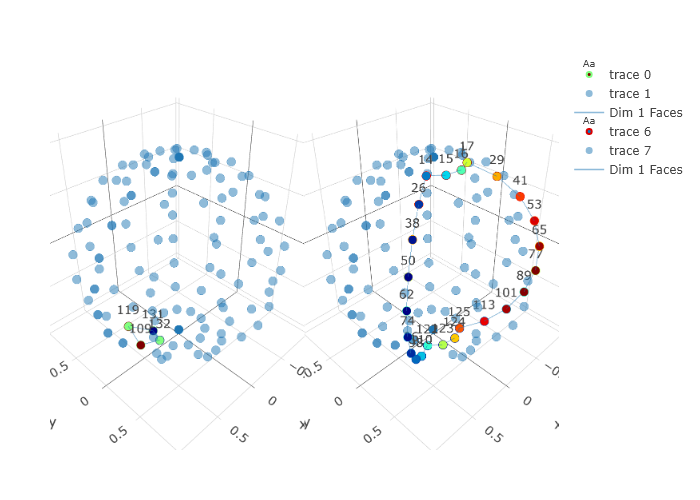

In [128]:
p1 = plotclassrep_pjs(PH,dim=1,class=1)
p2 = plotclassrep_pjs(PH,dim=1,class=98)
p = [p1 p2]
# classrep(PH, dim=1, class=1)


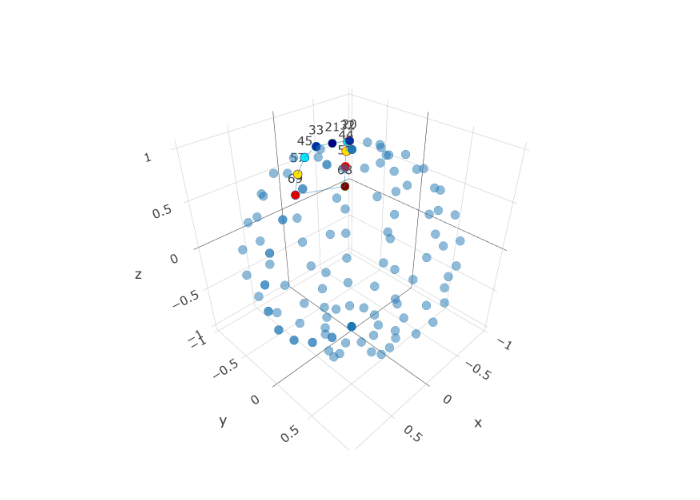

In [77]:
plotclassrep_pjs(PH,dim=1,class=82)